<a href="https://colab.research.google.com/github/Clever-developer14/Pneumonia_detection_proj/blob/main/Pneumonia_detection_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz

--2024-11-09 15:31:13--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 3.5.29.189, 54.231.133.169, 3.5.27.70, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|3.5.29.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223407715 (1.1G) [application/x-gzip]
Saving to: ‘xray_dataset.tar.gz’

xray_dataset.tar.gz 100%[===================>]   1.14G  45.8MB/s    in 23s     

2024-11-09 15:31:36 (50.7 MB/s) - ‘xray_dataset.tar.gz’ saved [1223407715/1223407715]



In [ ]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "not available")


GPU is available


In [ ]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz

--2024-11-09 15:35:40--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 54.231.172.249, 54.231.172.113, 3.5.28.161, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|54.231.172.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223407715 (1.1G) [application/x-gzip]
Saving to: ‘xray_dataset.tar.gz’

xray_dataset.tar.gz 100%[===================>]   1.14G  12.7MB/s    in 1m 45s  

2024-11-09 15:37:26 (11.1 MB/s) - ‘xray_dataset.tar.gz’ saved [1223407715/1223407715]



In [ ]:
!ls /content

sample_data  xray_dataset.tar.gz


In [ ]:
!tar -xzvf /content/xray_dataset.tar.gz -C /content/extracted/

tar: /content/extracted: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!tar -xzvf /content/xray_dataset.tar.gz -C /content/

Streaming output truncated to the last 5000 lines.
chest_xray/train/NORMAL/NORMAL2-IM-1163-0001.jpeg
chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg
chest_xray/train/NORMAL/IM-0615-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-1226-0001.jpeg
chest_xray/train/NORMAL/IM-0317-0001.jpeg
chest_xray/train/NORMAL/IM-0494-0001.jpeg
chest_xray/train/NORMAL/IM-0180-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-1093-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0693-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0839-0001.jpeg
chest_xray/train/NORMAL/IM-0358-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0997-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0725-0001.jpeg
chest_xray/train/NORMAL/IM-0330-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0894-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0893-0001.jpeg
chest_xray/train/NORMAL/IM-0423-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0941-0001.jpeg
chest_xray/train/NORMAL/IM-0228-0001.jpeg
chest_xray/train

In this guided project, we'll take on the role of a Deep Learning Engineer for an R&D company that focuses on developing cutting edge technologies to assist hospitals in diagnosing patients, particularly children. Thanks to researchers from the University of California, San Diego, the company has access to a dataset containing 5856 chest X-ray images from children, split between a training dataset and a test dataset. Each image has a label that specifies if the X-ray corresponds to a patient with pneumonia or one without it.

We're tasked with building a deep learning model trained on these images that can accurately classify whether an X-ray indicates signs of pneumonia.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 64  # Choose from 32, 64, 128, 256
IMG_SIZE = (256, 256)  # Set to 256x256 or smaller
VALIDATION_SPLIT = 0.2  # Fraction of the training set for validation (e.g., 20%)

In [ ]:
train_data_dir = '/content/xray_dataset/'


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=123,  # Ensure consistency in splitting
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

NotFoundError: Could not find directory /content/xray_dataset/

In [ ]:
! ls /content

chest_xray  sample_data  xray_dataset.tar.gz


In [ ]:
train_data_dir = '/content/chest_xray/'

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=123,  # Ensure consistency in splitting
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.


In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 5856 files belonging to 2 classes.
Using 1171 files for validation.


In [ ]:
# Define data augmentation transformations
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),    # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.1),         # Randomly rotate images by up to 10%
    tf.keras.layers.RandomZoom(0.1)              # Randomly zoom images
])

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# Prefetch both training and validation datasets
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
# Re-define train_data_dir if needed
train_data_dir = '/content/chest_xray/'

# Parameters
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
VALIDATION_SPLIT = 0.2  # Adjust the fraction as desired

# Define training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=VALIDATION_SPLIT,  # Use a portion of data for validation
    subset="training",
    seed=123,  # Consistent split
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

# Apply augmentation to training dataset only
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
train_batches = tf.data.experimental.cardinality(train_dataset)
validation_batches = tf.data.experimental.cardinality(validation_dataset)
print(f"Training batches: {train_batches}")
print(f"Validation batches: {validation_batches}")


Training batches: 74
Validation batches: 19


In [ ]:
test_data_dir = '/content/chest_xray_test/'  # Path to the test dataset folder

# Load the test dataset (no validation split or augmentation)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=IMG_SIZE,  # Use the same image size as training
    batch_size=BATCH_SIZE
)


NotFoundError: Could not find directory /content/chest_xray_test/

In [ ]:
!ls /content

chest_xray  sample_data  xray_dataset.tar.gz


In [ ]:
test_data_dir = '/content/chest_xray/test'  # Path to the test dataset folder

# Load the test dataset (no validation split or augmentation)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=IMG_SIZE,  # Use the same image size as training
    batch_size=BATCH_SIZE
)


Found 624 files belonging to 2 classes.


In [ ]:
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# Check the first batch from the test dataset
for images, labels in test_dataset.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")


Images shape: (64, 256, 256, 3)
Labels shape: (64,)


In [ ]:
# Define the rescaling layer
rescale_layer = tf.keras.layers.Rescaling(1./255)


In [ ]:
# Apply rescaling to the training dataset
train_dataset = train_dataset.map(
    lambda x, y: (rescale_layer(x), y),  # Apply rescaling to images, keep the labels
    num_parallel_calls=tf.data.AUTOTUNE   # Optimize for performance
)


In [ ]:
# Apply rescaling to the validation dataset
validation_dataset = validation_dataset.map(
    lambda x, y: (rescale_layer(x), y),  # Apply rescaling to images, keep the labels
    num_parallel_calls=tf.data.AUTOTUNE   # Optimize for performance
)


In [ ]:
# Apply rescaling to the test dataset
test_dataset = test_dataset.map(
    lambda x, y: (rescale_layer(x), y),  # Apply rescaling to images, keep the labels
    num_parallel_calls=tf.data.AUTOTUNE   # Optimize for performance
)


In [ ]:
# Prefetch to improve performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# Check the first batch from the training dataset
for images, labels in train_dataset.take(1):
    print(f"Train images shape: {images.shape}")
    print(f"Train labels shape: {labels.shape}")

# Check the first batch from the validation dataset
for images, labels in validation_dataset.take(1):
    print(f"Validation images shape: {images.shape}")
    print(f"Validation labels shape: {labels.shape}")

# Check the first batch from the test dataset
for images, labels in test_dataset.take(1):
    print(f"Test images shape: {images.shape}")
    print(f"Test labels shape: {labels.shape}")


Train images shape: (64, 256, 256, 3)
Train labels shape: (64,)
Validation images shape: (64, 256, 256, 3)
Validation labels shape: (64,)
Test images shape: (64, 256, 256, 3)
Test labels shape: (64,)


In [ ]:
# Print the class names of the training dataset
print(train_dataset.class_names)


NameError: name 'train_dataset' is not defined

In [ ]:
train_data_dir = '/content/chest_xray/train'  # Ensure this path is correct for your setup

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(256, 256),  # Example image size (adjust as necessary)
    batch_size=32,
    label_mode='int',  # Use 'int' for integer labels
    shuffle=True  # Shuffle data
)


NameError: name 'tf' is not defined

In [ ]:
import tensorflow as tf


In [ ]:
train_data_dir = '/content/chest_xray/train'

# Load the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(256, 256),  # Resize all images to 256x256
    batch_size=32,
    label_mode='int',  # Use 'int' for integer labels
    shuffle=True  # Shuffle data
)

# Print the class names of the training dataset
print(train_dataset.class_names)

NotFoundError: Could not find directory /content/chest_xray/train

In [ ]:
!tar -xzvf xray_dataset.tar.gz -C /content


tar (child): xray_dataset.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz -P /content/drive/MyDrive/xray_dataset/


--2024-11-09 18:23:35--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 52.216.52.33, 3.5.7.105, 54.231.137.1, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|52.216.52.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223407715 (1.1G) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/xray_dataset/xray_dataset.tar.gz’

xray_dataset.tar.gz 100%[===================>]   1.14G  47.9MB/s    in 25s     

2024-11-09 18:24:00 (47.3 MB/s) - ‘/content/drive/MyDrive/xray_dataset/xray_dataset.tar.gz’ saved [1223407715/1223407715]



In [ ]:
!tar -xzvf /content/drive/MyDrive/xray_dataset/xray_dataset.tar.gz -C /content/drive/MyDrive/xray_dataset/


Streaming output truncated to the last 5000 lines.
chest_xray/train/NORMAL/NORMAL2-IM-1163-0001.jpeg
chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg
chest_xray/train/NORMAL/IM-0615-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-1226-0001.jpeg
chest_xray/train/NORMAL/IM-0317-0001.jpeg
chest_xray/train/NORMAL/IM-0494-0001.jpeg
chest_xray/train/NORMAL/IM-0180-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-1093-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0693-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0839-0001.jpeg
chest_xray/train/NORMAL/IM-0358-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0997-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0725-0001.jpeg
chest_xray/train/NORMAL/IM-0330-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0894-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0893-0001.jpeg
chest_xray/train/NORMAL/IM-0423-0001.jpeg
chest_xray/train/NORMAL/NORMAL2-IM-0941-0001.jpeg
chest_xray/train/NORMAL/IM-0228-0001.jpeg
chest_xray/train

In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
import tensorflow as tf

# Correct path to training data
train_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/train'

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Batch size
    validation_split=0.2,  # Use 20% of data for validation
    subset="training",  # This subset will be the training data
    seed=123,  # Ensure reproducibility
    label_mode='int',  # Integer labels
)

# Display the class names (labels) for training dataset
print("Training class names:", train_dataset.class_names)


Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Training class names: ['NORMAL', 'PNEUMONIA']


In [9]:
# Load validation dataset (subset from the same directory)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Same batch size as training
    validation_split=0.2,  # Same validation split as before
    subset="validation",  # This subset will be the validation data
    seed=123,  # Ensure reproducibility
    label_mode='int',  # Integer labels
)

# Display the class names (labels) for validation dataset
print("Validation class names:", validation_dataset.class_names)


Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
Validation class names: ['NORMAL', 'PNEUMONIA']


In [ ]:
# Correct path to test data
test_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/test'

# Load test dataset (no validation split)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Same batch size as training and validation
    label_mode='int',  # Integer labels
)

# Display the class names (labels) for the test dataset
print("Test class names:", test_dataset.class_names)


Found 624 files belonging to 2 classes.
Test class names: ['NORMAL', 'PNEUMONIA']


In [ ]:
# Data Augmentation for the training set
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),  # Random horizontal flip
    tf.keras.layers.RandomRotation(0.2),  # Random rotation
    tf.keras.layers.RandomZoom(0.2),  # Random zoom
])

# Rescaling layer (scaling pixel values to [0, 1])
rescale_layer = tf.keras.layers.Rescaling(1./255)

# Apply data augmentation and rescaling to the training dataset
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(rescale_layer(x)), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

# Apply rescaling to the validation and test datasets (no augmentation)
validation_dataset = validation_dataset.map(
    lambda x, y: (rescale_layer(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

test_dataset = test_dataset.map(
    lambda x, y: (rescale_layer(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

# Prefetch datasets for better performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# Print the class names of the training dataset
print(train_dataset.class_names)


['NORMAL', 'PNEUMONIA']


In [6]:
import tensorflow as tf

# Path to training data
train_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/train'

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Batch size
    validation_split=0.2,  # Use 20% of data for validation
    subset="training",  # This subset will be the training data
    seed=123,  # Ensure reproducibility
    label_mode='int',  # Integer labels
)

# Print the class names (labels) for the training dataset
print("Training class names:", train_dataset.class_names)


Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Training class names: ['NORMAL', 'PNEUMONIA']


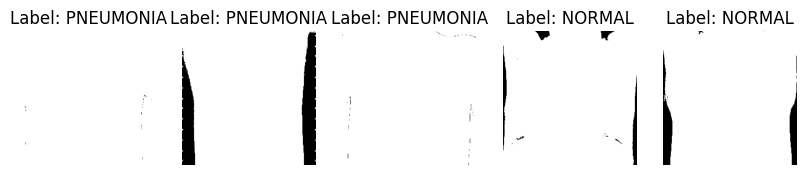

Labels for the first batch of images: [1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
Shape of images in the first batch: (32, 256, 256, 3)


In [ ]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels from the training dataset
image_batch, label_batch = next(iter(train_dataset))

# Display the first 5 images in the batch
plt.figure(figsize=(10, 10))
for i in range(5):  # Display first 5 images
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i])  # Show the image
    plt.title(f"Label: {train_dataset.class_names[label_batch[i]]}")  # Display the label
    plt.axis("off")
plt.show()

# Print the labels of the images in the batch
print("Labels for the first batch of images:", label_batch.numpy())

# Print the shape of the images in the batch
print("Shape of images in the first batch:", image_batch.shape)


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

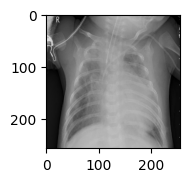

In [ ]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels from the test dataset
image_batch, label_batch = next(iter(test_dataset))

# Display the first 5 images in the batch
plt.figure(figsize=(10, 10))
for i in range(5):  # Display first 5 images
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i])  # Show the image
    plt.title(f"Label: {test_dataset.class_names[label_batch[i]]}")  # Display the label
    plt.axis("off")
plt.show()

# Print the labels of the images in the batch
print("Labels for the first batch of test images:", label_batch.numpy())


In [ ]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels from the test dataset
image_batch, label_batch = next(iter(test_dataset))

# Extract the class names (this will work as we know the folder names)
class_names = test_dataset.class_names

# Display the first 5 images in the batch
plt.figure(figsize=(10, 10))
for i in range(5):  # Display first 5 images
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i])  # Show the image
    plt.title(f"Label: {class_names[label_batch[i]]}")  # Display the label
    plt.axis("off")
plt.show()

# Print the labels of the images in the batch
print("Labels for the first batch of test images:", label_batch.numpy())


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [5]:
import tensorflow as tf

# Correct path to test data in Google Drive
test_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/test'

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Batch size
    label_mode='int'  # Integer labels
)

# Check the class names
print("Test dataset class names:", test_dataset.class_names)


Found 624 files belonging to 2 classes.
Test dataset class names: ['NORMAL', 'PNEUMONIA']


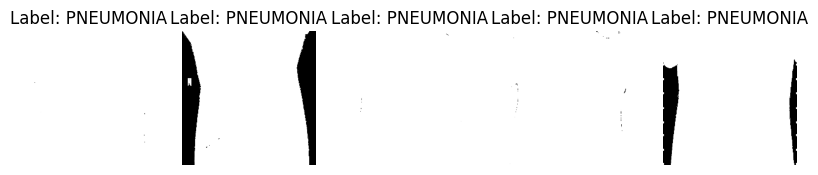

Labels for the first batch of test images: [1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0]


In [ ]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels from the test dataset
image_batch, label_batch = next(iter(test_dataset))

# Extract the class names
class_names = test_dataset.class_names

# Display the first 5 images in the batch
plt.figure(figsize=(10, 10))
for i in range(5):  # Display first 5 images
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i])  # Show the image
    plt.title(f"Label: {class_names[label_batch[i]]}")  # Display the label
    plt.axis("off")
plt.show()

# Print the labels of the images in the batch
print("Labels for the first batch of test images:", label_batch.numpy())


In [ ]:
import tensorflow as tf

# Define the model (as an example)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize the images
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Assuming 2 classes: "NORMAL" and "PNEUMONIA"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the checkpoint callback to save model weights to Google Drive
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/xray_dataset/model_checkpoint.keras',  # Path to save the model with .keras extension
    save_best_only=True,  # Save only the best model (based on validation loss)
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Save model when validation loss is minimized
    verbose=1  # Print a message when the model is saved
)


# Train the model and include the checkpoint callback
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[checkpoint_callback]  # Add the checkpoint callback here
)


NameError: name 'val_dataset' is not defined

In [ ]:
import tensorflow as tf

# Define the directories for training and validation data
train_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/train'


# Load the validation dataset (from the same directory) by specifying subset="validation"
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    subset="validation",  # Specify this subset is for validation
    seed=123,
    label_mode='int'
)



Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


In [ ]:
import tensorflow as tf

In [ ]:
# Define the model (as an example)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize the images
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Assuming 2 classes: "NORMAL" and "PNEUMONIA"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the checkpoint callback to save model weights to Google Drive
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/xray_dataset/model_checkpoint.keras',  # Path to save the model
    save_best_only=True,  # Save only the best model (based on validation loss)
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Save model when validation loss is minimized
    verbose=1  # Print a message when the model is saved
)

# Train the model and include the checkpoint callback
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[checkpoint_callback]  # Add the checkpoint callback here
)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7864 - loss: 4.9756
Epoch 1: val_loss improved from inf to 0.08897, saving model to /content/drive/MyDrive/xray_dataset/model_checkpoint.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 74s 519ms/step - accuracy: 0.7872 - loss: 4.9503 - val_accuracy: 0.9713 - val_loss: 0.0890
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.9764 - loss: 0.0726
Epoch 2: val_loss improved from 0.08897 to 0.05780, saving model to /content/drive/MyDrive/xray_dataset/model_checkpoint.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 64s 409ms/step - accuracy: 0.9764 - loss: 0.0726 - val_accuracy: 0.9837 - val_loss: 0.0578
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9829 - loss: 0.0422
Epoch 3: val_loss improved from 0.05780 to 0.05466, saving model to /content/drive/MyDrive/xray_dataset/model_checkpoint.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 57s 440ms/step - accuracy: 0.9829 - loss: 0.0422 - val_accuracy: 0.9828 - val_loss: 0.0547

In [ ]:
# Load the model from the checkpoint
restored_model = tf.keras.models.load_model('/content/drive/MyDrive/xray_dataset/model_checkpoint.keras')

# Check the model summary to verify it's loaded
restored_model.summary()

# Continue training (if needed)
restored_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,  # Continue for additional epochs, or adjust as necessary
    callbacks=[checkpoint_callback]
)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      33,032,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,099,848 (378.04 MB)

 Trainable params: 33,033,282 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,066,566 (252.02 MB)

NameError: name 'checkpoint_callback' is not defined

In [5]:
import tensorflow as tf

# Redefine the checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/xray_dataset/model_checkpoint.keras',  # Path to save the model
    save_best_only=True,  # Save only the best model (based on validation loss)
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Save model when validation loss is minimized
    verbose=1  # Print a message when the model is saved
)

# Load the model from the checkpoint
restored_model = tf.keras.models.load_model('/content/drive/MyDrive/xray_dataset/model_checkpoint.keras')

# Check the model summary to verify it's loaded
restored_model.summary()

# Continue training (if needed)
restored_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,  # Continue for additional epochs, or adjust as necessary
    callbacks=[checkpoint_callback]
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      33,032,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,099,848 (378.04 MB)

 Trainable params: 33,033,282 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,066,566 (252.02 MB)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0024
Epoch 1: val_loss improved from inf to 0.06335, saving model to /content/drive/MyDrive/xray_dataset/model_checkpoint.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 775s 6s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9799 - val_loss: 0.0634
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0020
Epoch 2: val_loss improved from 0.06335 to 0.05748, saving model to /content/drive/MyDrive/xray_dataset/model_checkpoint.keras
131/131 ━━━━━━━━━━━━━━━━━━━━ 729s 5s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9847 - val_loss: 0.0575
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0010
Epoch 3: val_loss did not improve from 0.05748
131/131 ━━━━━━━━━━━━━━━━━━━━ 667s 5s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9818 - val_loss: 0.0631
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 9.0196e-04
Epoch 4: 

In [6]:
import tensorflow as tf

# Instantiate the Sequential model
cnn_model = tf.keras.Sequential([
    # Rescaling layer to normalize pixel values
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Adjust input_shape to your image size and channels

    # First Convolutional Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output to feed into Dense layers
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting

    # Output layer (using softmax for multi-class classification, adjust units to your number of classes)
    tf.keras.layers.Dense(2, activation='softmax')  # Assuming 2 classes (e.g., NORMAL and PNEUMONIA)
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,234 (56.61 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf

# Define the number of classes in the dataset (adjust to match your data)
num_classes = 2  # For example, 2 classes: NORMAL and PNEUMONIA

# Instantiate the Sequential model
cnn_model = tf.keras.Sequential([
    # Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),  # Adjust input_shape if needed

    # Max Pooling Layer
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # Fully-Connected Layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer (number of units = number of classes, with softmax for multi-class classification)
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use sigmoid activation for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # 'binary_crossentropy' if there are 2 classes
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      66,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,065,666 (252.02 MB)

 Trainable params: 66,065,666 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Display the model summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      66,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,065,666 (252.02 MB)

 Trainable params: 66,065,666 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import tensorflow as tf

# Choose an optimizer and specify the learning rate
learning_rate = 0.001  # You can adjust this based on experimentation
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Display the optimizer's configuration
print(optimizer.get_config())


{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [10]:
# Compile the model
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' for sigmoid output
                  metrics=['accuracy'])

# Display confirmation of successful compilation
print("Model compiled successfully.")


Model compiled successfully.


In [11]:
# Set the number of epochs (start with a low value like 3 or 5)
epochs = 5

# Fit the model on the training set and evaluate on the validation set
history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.7443 - loss: 2922.5735 - val_accuracy: 0.9713 - val_loss: 3.8282
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 500s 4s/step - accuracy: 0.9513 - loss: 11.2547 - val_accuracy: 0.6616 - val_loss: 137.2572
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 509s 4s/step - accuracy: 0.9398 - loss: 14.2158 - val_accuracy: 0.9799 - val_loss: 4.1540
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 506s 4s/step - accuracy: 0.9602 - loss: 8.9475 - val_accuracy: 0.9742 - val_loss: 3.6685
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 499s 4s/step - accuracy: 0.9441 - loss: 25.6103 - val_accuracy: 0.9665 - val_loss: 4.1302


After training for 5 epochs, the model’s accuracy on the training set and validation set provides an initial view of its performance. If the training and validation accuracy are both reasonably high, this indicates the model is learning useful patterns for classification.

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

# Build the CNN model with added layers and regularization
cnn_model = models.Sequential([
    data_augmentation,  # Data augmentation layer to improve generalization
    layers.Rescaling(1./255),  # Normalize pixel values

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Add dropout layer for regularization
    layers.Dropout(0.3),  # Dropout rate of 30%

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Another dropout layer with a rate of 50%
    layers.Dense(2, activation='softmax')
])

# Compile the model with an optimizer and loss function
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Early stopping callback to avoid overfitting
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=3,          # Stops training if no improvement in 3 epochs
    restore_best_weights=True  # Restores model to best weights
)

# Train the model
epochs = 15
history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping_callback]
)


Epoch 1/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 964s 7s/step - accuracy: 0.7502 - loss: 1.3317 - val_accuracy: 0.4904 - val_loss: 0.7122
Epoch 2/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 936s 7s/step - accuracy: 0.7965 - loss: 0.4583 - val_accuracy: 0.8547 - val_loss: 0.3562
Epoch 3/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 899s 7s/step - accuracy: 0.8378 - loss: 0.3967 - val_accuracy: 0.8815 - val_loss: 0.3106
Epoch 4/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 928s 7s/step - accuracy: 0.8633 - loss: 0.3479 - val_accuracy: 0.8767 - val_loss: 0.3479
Epoch 5/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 913s 7s/step - accuracy: 0.8677 - loss: 0.3344 - val_accuracy: 0.8518 - val_loss: 0.3635
Epoch 6/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 935s 7s/step - accuracy: 0.8806 - loss: 0.3248 - val_accuracy: 0.7992 - val_loss: 0.4302


Modifications to Improve Model Performance
Data Augmentation Layer:

Added a data augmentation layer with random flips, rotations, and zooms. This artificially increases the diversity of the dataset, helping the model generalize better to unseen images by training on variations in orientation and scale.
Additional Convolutional Layers:

Increased the depth of the model by adding more convolutional and pooling layers. These layers allow the model to learn more complex patterns, which is crucial for a task like image classification.
Dropout Regularization:

Introduced Dropout layers after some convolutional and dense layers. Dropout randomly disables a fraction of neurons during training, which prevents the model from overfitting by reducing dependency on specific neurons.
L2 Regularization:

Applied L2 regularization to the dense layer. This penalty discourages large weights, reducing the risk of overfitting by forcing the model to rely on a balanced set of features rather than specific nodes.
Early Stopping Callback:

Added an EarlyStopping callback to monitor the validation loss and stop training when it plateaus, with a patience of 3 epochs. This approach conserves resources and prevents overfitting by restoring the best model weights once no further validation improvement is observed.

In [13]:
import tensorflow as tf

# Load the pre-trained ResNet50 model
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected output layers
    weights='imagenet',  # Load pre-trained weights from ImageNet
    input_shape=(256, 256, 3)  # Input image size (adjust as needed)
)

# Freeze the layers of the pre-trained model to avoid retraining
resnet_model.trainable = False

# Print the model summary to verify the structure
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
import tensorflow as tf

# Load the pre-trained ResNet50 model
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected output layers
    weights='imagenet',  # Load pre-trained weights from ImageNet
    input_shape=(256, 256, 3)  # Input image size
)

# Freeze all layers of the ResNet50 base model
for layer in resnet_model.layers:
    layer.trainable = False

# Print the model summary to verify that layers are frozen
resnet_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define the input shape for the model
input_layer = Input(shape=(256, 256, 3))  # Adjust the image size to (256, 256, 3) or your desired size

# Preprocess the input images as done for the ResNet50 model
preprocessed_input = tf.keras.applications.resnet50.preprocess_input(input_layer)

# Load the pre-trained ResNet50 model
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected layers
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=preprocessed_input  # Pass the preprocessed input tensor to the model
)

# Freeze all layers of the ResNet50 base model
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom layers after the ResNet50 base model (for your classification task)
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)  # Adjust the output layer for the number of classes

# Create the final model
model = Model(inputs=input_layer, outputs=x)

# Print the model summary
model.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 256, 256)       │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 256, 256, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256, 256, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)             

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define the input shape for the model (adjust to your dataset size)
input_layer = Input(shape=(256, 256, 3))  # Example input size: 256x256 RGB images

# Preprocess the input images as done for the ResNet50 model
preprocessed_input = tf.keras.applications.resnet50.preprocess_input(input_layer)

# Load the pre-trained ResNet50 model without the top layers
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected layers (since we will add our own)
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=preprocessed_input  # Pass the preprocessed input tensor
)

# The base ResNet50 model now outputs the features we need
# Add custom layers after the ResNet50 base model for our task
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)  # Output layer for 2 classes

# Create the final model using the input and output layers
model = Model(inputs=input_layer, outputs=x)

# Print the model summary to see the architecture
model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_3 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_4 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_5 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_1 (Stack)           │ (None, 256, 256, 3)    │              0 │ get_item_3[0][0],      │
│                           │                        │                │ get_item_4[0][0],      │
│                           │                        │                │ get_item_5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 256, 3)    │              0 │ stack_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)             

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 25,634,818 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define the input shape for the model (adjust to your dataset size)
input_layer = Input(shape=(256, 256, 3))  # Example input size: 256x256 RGB images

# Preprocess the input images as done for the ResNet50 model
preprocessed_input = tf.keras.applications.resnet50.preprocess_input(input_layer)

# Load the pre-trained ResNet50 model without the top layers
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected layers (since we will add our own)
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=preprocessed_input  # Pass the preprocessed input tensor
)

# Add a global average pooling layer after the ResNet50 base model
x = GlobalAveragePooling2D()(resnet_model.output)

# Add custom fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# Add the final output layer (adjust the number of classes as needed)
x = Dense(2, activation='softmax')(x)  # For binary classification (2 classes)

# Create the final model
model = Model(inputs=input_layer, outputs=x)

# Print the model summary to view the architecture
model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_6 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_7 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_8 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_2 (Stack)           │ (None, 256, 256, 3)    │              0 │ get_item_6[0][0],      │
│                           │                        │                │ get_item_7[0][0],      │
│                           │                        │                │ get_item_8[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 256, 256, 3)    │              0 │ stack_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)             

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 25,634,818 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define the input shape for the model (adjust to your dataset size)
input_layer = Input(shape=(256, 256, 3))  # Example input size: 256x256 RGB images

# Preprocess the input images as done for the ResNet50 model
preprocessed_input = tf.keras.applications.resnet50.preprocess_input(input_layer)

# Load the pre-trained ResNet50 model without the top layers
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected layers (since we will add our own)
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=preprocessed_input  # Pass the preprocessed input tensor
)

# Add a global average pooling layer after the ResNet50 base model
x = GlobalAveragePooling2D()(resnet_model.output)

# Add custom fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

# Fully connected output layer for binary classification (2 classes)
output_layer = Dense(2, activation='softmax')(x)  # For binary classification with 2 classes

# Create the final model
model = Model(inputs=input_layer, outputs=output_layer)

# Print the model summary to view the architecture
model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_9 (GetItem)      │ (None, 256, 256)       │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_10 (GetItem)     │ (None, 256, 256)       │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_11 (GetItem)     │ (None, 256, 256)       │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_3 (Stack)           │ (None, 256, 256, 3)    │              0 │ get_item_9[0][0],      │
│                           │                        │                │ get_item_10[0][0],     │
│                           │                        │                │ get_item_11[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 256, 256, 3)    │              0 │ stack_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)             

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 25,634,818 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define the input shape for the model (adjust to your dataset size)
input_layer = Input(shape=(256, 256, 3))  # Example input size: 256x256 RGB images

# Preprocess the input images as done for the ResNet50 model
preprocessed_input = tf.keras.applications.resnet50.preprocess_input(input_layer)

# Load the pre-trained ResNet50 model without the top layers
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the fully connected layers (since we will add our own)
    weights='imagenet',  # Use pre-trained weights from ImageNet
    input_tensor=preprocessed_input  # Pass the preprocessed input tensor
)

# Add a global average pooling layer after the ResNet50 base model
x = GlobalAveragePooling2D()(resnet_model.output)

# Add custom fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

# Fully connected output layer for binary classification (2 classes)
output_layer = Dense(2, activation='softmax')(x)  # For binary classification with 2 classes

# Create the final model
cnn_model = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
cnn_model.summary()


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_12 (GetItem)     │ (None, 256, 256)       │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_13 (GetItem)     │ (None, 256, 256)       │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_14 (GetItem)     │ (None, 256, 256)       │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_4 (Stack)           │ (None, 256, 256, 3)    │              0 │ get_item_12[0][0],     │
│                           │                        │                │ get_item_13[0][0],     │
│                           │                        │                │ get_item_14[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 256, 256, 3)    │              0 │ stack_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)             

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 25,634,818 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Choose Adam optimizer with a small learning rate
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for binary classification (2 classes)
    metrics=['accuracy']
)

# Define EarlyStopping callback to stop training when validation loss stops improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Wait for 3 epochs after no improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Fit the model on the training dataset and validate on the validation set
history = cnn_model.fit(
    train_dataset,  # Training dataset
    validation_data=val_dataset,  # Validation dataset
    epochs=10,  # Train for a maximum of 10 epochs
    callbacks=[early_stopping_callback]  # Use EarlyStopping callback
)

# Plot the training and validation accuracies and loss values
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_training_history(history)


NameError: name 'cnn_model' is not defined

In [1]:
# Unfreeze some layers in the base model for fine-tuning
for layer in cnn_model.layers[-20:]:  # Unfreezing the last 20 layers as an example
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model with a smaller learning rate for fine-tuning
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping to monitor validation loss
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Fine-tune the model
fine_tune_history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,  # Limit to 5 epochs for fine-tuning
    callbacks=[early_stopping_callback]
)

# Plot training and validation accuracy and loss for the fine-tuning phase
plot_training_history(fine_tune_history)


NameError: name 'cnn_model' is not defined

In [3]:
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/xray_dataset/model_checkpoint.keras')


In [10]:
# Unfreeze some layers in the base model for fine-tuning
for layer in cnn_model.layers[-20:]:  # Unfreezing the last 20 layers as an example
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model with a smaller learning rate for fine-tuning
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping to monitor validation loss
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Fine-tune the model
fine_tune_history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,  # Limit to 5 epochs for fine-tuning
    callbacks=[early_stopping_callback]
)

# Plot training and validation accuracy and loss for the fine-tuning phase
plot_training_history(fine_tune_history)


NameError: name 'val_dataset' is not defined

In [11]:
import tensorflow as tf

# Define paths for training, validation, and test datasets
train_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/train'
val_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/xray_dataset/chest_xray/test'

IMG_SIZE = (256, 256)
BATCH_SIZE = 32

# Load datasets with appropriate parameters
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
Found 624 files belonging to 2 classes.


In [12]:
# Unfreeze layers, compile the model, and fit as described previously
for layer in cnn_model.layers[-20:]:  # Adjust the number of layers as needed
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model with the specified learning rate
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
fine_tune_history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    callbacks=[early_stopping_callback]
)


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 718s 5s/step - accuracy: 0.9950 - loss: 0.0179 - val_accuracy: 0.9971 - val_loss: 0.0095
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 74s 373ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9981 - val_loss: 0.0097
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 48s 363ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9981 - val_loss: 0.0097


In [13]:
# Evaluate the initial (un-fine-tuned) model
initial_model = tf.keras.models.load_model('/content/drive/MyDrive/xray_dataset/model_checkpoint.keras')
initial_loss, initial_accuracy = initial_model.evaluate(test_dataset)
print(f"Initial Model Test Accuracy: {initial_accuracy * 100:.2f}%")

# Evaluate the fine-tuned model
fine_tuned_loss, fine_tuned_accuracy = cnn_model.evaluate(test_dataset)
print(f"Fine-Tuned Model Test Accuracy: {fine_tuned_accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.7317 - loss: 1.5946
Initial Model Test Accuracy: 73.40%
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.7306 - loss: 1.6992
Fine-Tuned Model Test Accuracy: 72.60%


Model Performance Comparison
Initial Model: Achieved a test accuracy of 73.40% with a loss of 1.5946.
Fine-Tuned Model: Achieved a test accuracy of 72.60% with a slightly higher loss of 1.6992.
Observations
Accuracy: The initial model has a slightly better accuracy than the fine-tuned model, with a 0.8% difference. This minor drop could indicate that fine-tuning did not significantly benefit the model’s performance on the test set.
Loss: The initial model's lower loss suggests it may be better optimized for generalization on the test data, whereas the fine-tuned model might have overfitted to the training or validation set.
Conclusion
The fine-tuning process, while aimed at improving performance, did not yield a substantial improvement in accuracy or reduction in loss. This suggests that the model may have reached a performance plateau or requires further architectural adjustments (such as additional regularization or augmentation) to effectively benefit from fine-tuning.
